In [3]:
import sys
sys.path.append('../')
from src.embedders.base_embedder import BaseEmbedder
import torch
from src.metrics.euclidian import EuclideanDistance
from src.metrics.mahalanobis import MahalanobisDistance
from src.metrics.cosine_similarity import CosineSimilarity
from torch.nn.functional import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
model = BaseEmbedder()

Successfully loaded imagenet pretrained weights from "/home/nhuengzii/.cache/torch/checkpoints/osnet_ain_x1_0_imagenet.pth"


[ WARN:0@1.855] global loadsave.cpp:248 findDecoder imread_('./non_target2.png'): can't open/read file: check file path/integrity


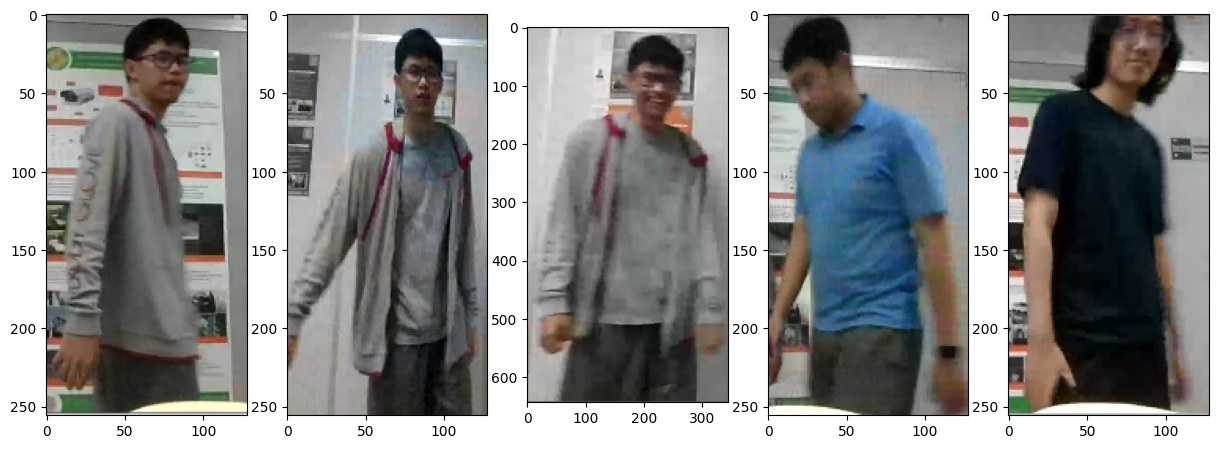

In [3]:
target = cv2.imread('./target.png')
target1 = cv2.imread('./target1.png')
target2 = cv2.imread('./target2.png')
non_target = cv2.imread('./non_target.png')
non_target1 = cv2.imread('./non_target1.png')
non_target2 = cv2.imread('./non_target2.png')

target = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)
target = cv2.resize(target, (128, 256))
target1 = cv2.cvtColor(target1, cv2.COLOR_BGR2RGB)
target1 = cv2.resize(target1, (128, 256))
target2 = cv2.cvtColor(target2, cv2.COLOR_BGR2RGB)
non_target = cv2.cvtColor(non_target, cv2.COLOR_BGR2RGB)
non_target = cv2.resize(non_target, (128, 256))
non_target1 = cv2.cvtColor(non_target1, cv2.COLOR_BGR2RGB)
non_target1 = cv2.resize(non_target1, (128, 256))

target = torch.from_numpy(target).permute(2, 0, 1).unsqueeze(0).float()
target1 = torch.from_numpy(target1).permute(2, 0, 1).unsqueeze(0).float()
target2 = torch.from_numpy(target2).permute(2, 0, 1).unsqueeze(0).float()
non_target = torch.from_numpy(non_target).permute(2, 0, 1).unsqueeze(0).float()
non_target1 = torch.from_numpy(non_target1).permute(2, 0, 1).unsqueeze(0).float()
plt.subplots(1, 5, figsize=(15, 15))
plt.subplot(1, 5, 1)
plt.imshow(target.squeeze().permute(1, 2, 0).numpy().astype(np.uint8))
plt.subplot(1, 5, 2)
plt.imshow(target1.squeeze().permute(1, 2, 0).numpy().astype(np.uint8))
plt.subplot(1, 5, 3)
plt.imshow(target2.squeeze().permute(1, 2, 0).numpy().astype(np.uint8))
plt.subplot(1, 5, 4)
plt.imshow(non_target.squeeze().permute(1, 2, 0).numpy().astype(np.uint8))
plt.subplot(1, 5, 5)
plt.imshow(non_target1.squeeze().permute(1, 2, 0).numpy().astype(np.uint8))
plt.show()

In [4]:
target_feature = model.model(target)
target1_feature = model.model(target1)
target2_feature = model.model(target2)
non_target_feature = model.model(non_target)
non_target1_feature = model.model(non_target1)

In [5]:
target_target2 = torch.cdist(target_feature, target2_feature)
target_non_target = torch.cdist(target_feature, non_target_feature)
target_non_target1 = torch.cdist(target_feature, non_target1_feature)

target1_target2 = torch.cdist(target1_feature, target2_feature)
target1_non_target = torch.cdist(target1_feature, non_target_feature)
target1_non_target1 = torch.cdist(target1_feature, non_target1_feature)

mean_target2 = (target_target2 + target1_target2) / 2
mean_non_target = (target_non_target + target1_non_target + target1_non_target1) / 3
mean_non_target2 = (target_non_target + target1_non_target) / 2

print('target_target2', target_target2)
print('target_non_target', target_non_target)
print('target_non_target1', target_non_target1)
print('target1_target2', target1_target2)
print('target1_non_target', target1_non_target)
print('target1_non_target1', target1_non_target1)

print('mean_target2', mean_target2)
print('mean_non_target', mean_non_target)
print('mean_non_target2', mean_non_target2)


target_target2 tensor([[22.1040]], grad_fn=<CdistBackward0>)
target_non_target tensor([[21.8198]], grad_fn=<CdistBackward0>)
target_non_target1 tensor([[18.8447]], grad_fn=<CdistBackward0>)
target1_target2 tensor([[17.7812]], grad_fn=<CdistBackward0>)
target1_non_target tensor([[23.2176]], grad_fn=<CdistBackward0>)
target1_non_target1 tensor([[20.8941]], grad_fn=<CdistBackward0>)
mean_target2 tensor([[19.9426]], grad_fn=<DivBackward0>)
mean_non_target tensor([[21.9772]], grad_fn=<DivBackward0>)
mean_non_target2 tensor([[22.5187]], grad_fn=<DivBackward0>)


In [6]:
target_target2 = torch.nn.functional.cosine_similarity(target_feature, target2_feature)
target_non_target = torch.nn.functional.cosine_similarity(target_feature, non_target_feature)
target_non_target1 = torch.nn.functional.cosine_similarity(target_feature, non_target1_feature)

target1_target2 = torch.nn.functional.cosine_similarity(target1_feature, target2_feature)
target1_non_target = torch.nn.functional.cosine_similarity(target1_feature, non_target_feature)
target1_non_target1 = torch.nn.functional.cosine_similarity(target1_feature, non_target1_feature)

mean_target2 = (target_target2 + target1_target2) / 2
mean_non_target = (target_non_target + target1_non_target + target1_non_target1) / 3
mean_non_target2 = (target_non_target + target1_non_target) / 2

print('target_target2', target_target2)
print('target_non_target', target_non_target)
print('target_non_target1', target_non_target1)
print('target1_target2', target1_target2)
print('target1_non_target', target1_non_target)
print('target1_non_target1', target1_non_target1)

print('mean_target2', mean_target2)
print('mean_non_target', mean_non_target)
print('mean_non_target2', mean_non_target2)


target_target2 tensor([0.6297], grad_fn=<SumBackward1>)
target_non_target tensor([0.6697], grad_fn=<SumBackward1>)
target_non_target1 tensor([0.7604], grad_fn=<SumBackward1>)
target1_target2 tensor([0.6468], grad_fn=<SumBackward1>)
target1_non_target tensor([0.5080], grad_fn=<SumBackward1>)
target1_non_target1 tensor([0.6259], grad_fn=<SumBackward1>)
mean_target2 tensor([0.6383], grad_fn=<DivBackward0>)
mean_non_target tensor([0.6012], grad_fn=<DivBackward0>)
mean_non_target2 tensor([0.5888], grad_fn=<DivBackward0>)


In [7]:
data_features = torch.concat([target_feature, target1_feature])
query_features = torch.concat([target2_feature, non_target_feature, non_target1_feature])
euclid_met = EuclideanDistance()
cosine_met = CosineSimilarity()

euclid_distances = euclid_met.compute_distance(data_features, query_features)
# print(euclid_distances)
u_m = euclid_distances.T.mean(dim=1)
u_m_norm = (u_m - u_m.mean()) / u_m.std()
print(u_m_norm)
print('------------------')
print(u_m / u_m.sum())


cosine_sims = cosine_met.compute_similarity(data_features, query_features)
# print(cosine_sims)
c_m = cosine_sims.T.mean(dim=1)
c_m_norm = (c_m - c_m.mean()) / c_m.std()
print(c_m_norm)
print('------------------')
print(c_m / c_m.sum())

tensor([-0.5529,  1.1544, -0.6014], grad_fn=<DivBackward0>)
------------------
tensor([0.3199, 0.3613, 0.3188], grad_fn=<DivBackward0>)
tensor([-0.0349, -0.9821,  1.0170])
------------------
tensor([0.3324, 0.3066, 0.3610])


In [4]:
met_ma = MahalanobisDistance()
print(data_features.shape)
print(query_features.shape)
print(met_ma.compute_distances(data_features, query_features))
mh_mean = met_ma.compute_distances(data_features, query_features).mean(dim=1)
mh_norm = (mh_mean - mh_mean.mean()) / mh_mean.std()
print(mh_norm)
dist = met_ma.rank(data_features, query_features)
# print(dist)
print('------------------')
print(mh_mean / mh_mean.sum())

NameError: name 'data_features' is not defined

In [12]:
print('------------------')
a = 0.67 * (mh_mean / mh_mean.sum()) + 0.33 * (u_m / u_m.sum())

------------------
